In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



In [49]:
df = pd.read_csv('insurance_dataset.csv')
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [50]:
df.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [51]:
df["coverage_level"].unique()

array(['Premium', 'Standard', 'Basic'], dtype=object)

In [52]:
df["coverage_level"].replace({"Basic": 0, "Standard": 1, "Premium": 2}, inplace=True)

We replace the coverage levels with integers representative of the different tiers

In [53]:
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,2,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,2,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,2,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,1,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,1,19268.309838


In [54]:
df["exercise_frequency"].unique()

array(['Never', 'Occasionally', 'Rarely', 'Frequently'], dtype=object)

In [55]:
df["exercise_frequency"].replace({'Never': 0, 'Rarely': 1, 'Occasionally': 2, 'Frequently': 3}, inplace=True)

We do the same with the exercise frequency

In [56]:
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,0,Blue collar,2,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,2,White collar,2,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,2,Blue collar,2,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,1,White collar,1,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,1,White collar,1,19268.309838


In [57]:
print(df["coverage_level"].corr(df["charges"]))

0.46298126452652066


In [58]:
df["gender"].replace({"male": 0, "female": 1}, inplace=True)
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,0,21.45,5,yes,southeast,Diabetes,NaN,0,Blue collar,2,20460.307669
1,25,1,25.38,2,yes,northwest,Diabetes,High blood pressure,2,White collar,2,20390.899218
2,38,0,44.88,2,yes,southwest,NaN,High blood pressure,2,Blue collar,2,20204.476302
3,25,0,19.89,0,no,northwest,NaN,Diabetes,1,White collar,1,11789.029843
4,49,0,38.21,3,yes,northwest,Diabetes,High blood pressure,1,White collar,1,19268.309838


In [59]:
df["smoker"].replace({"no": 0, "yes": 1}, inplace=True)
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,0,21.45,5,1,southeast,Diabetes,NaN,0,Blue collar,2,20460.307669
1,25,1,25.38,2,1,northwest,Diabetes,High blood pressure,2,White collar,2,20390.899218
2,38,0,44.88,2,1,southwest,NaN,High blood pressure,2,Blue collar,2,20204.476302
3,25,0,19.89,0,0,northwest,NaN,Diabetes,1,White collar,1,11789.029843
4,49,0,38.21,3,1,northwest,Diabetes,High blood pressure,1,White collar,1,19268.309838


Currently our qualitative rows left are region, medial history, family medical history, and occupation

In [60]:
df.describe()

,age,gender,bmi,children,smoker,exercise_frequency,coverage_level,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,0.499893,34.001839,2.499886,0.500129,1.500500,0.999462,16735.117481
std,13.855189,0.500000,9.231680,1.707679,0.500000,1.117229,0.816390,4415.808211
min,18.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,3445.011643
25%,29.000000,0.000000,26.020000,1.000000,0.000000,1.000000,0.000000,13600.372379
50%,41.000000,0.000000,34.000000,2.000000,1.000000,2.000000,1.000000,16622.127973
75%,53.000000,1.000000,41.990000,4.000000,1.000000,2.000000,2.000000,19781.465410
max,65.000000,1.000000,50.000000,5.000000,1.000000,3.000000,2.000000,32561.560374


There are no missing values for any of our current quantitative collums

## Current observations

- our dataset has a slight male bias (however it does seem pretty even)
- our dataset is fairly evenly distributed between smoker and non-smoker with more people smoking than not
- the average age of the people in the dataset is around 41-42
- most people have the standard level plan with the distribution of the plans being fairly even
- the average person in out data set has 2-3 children


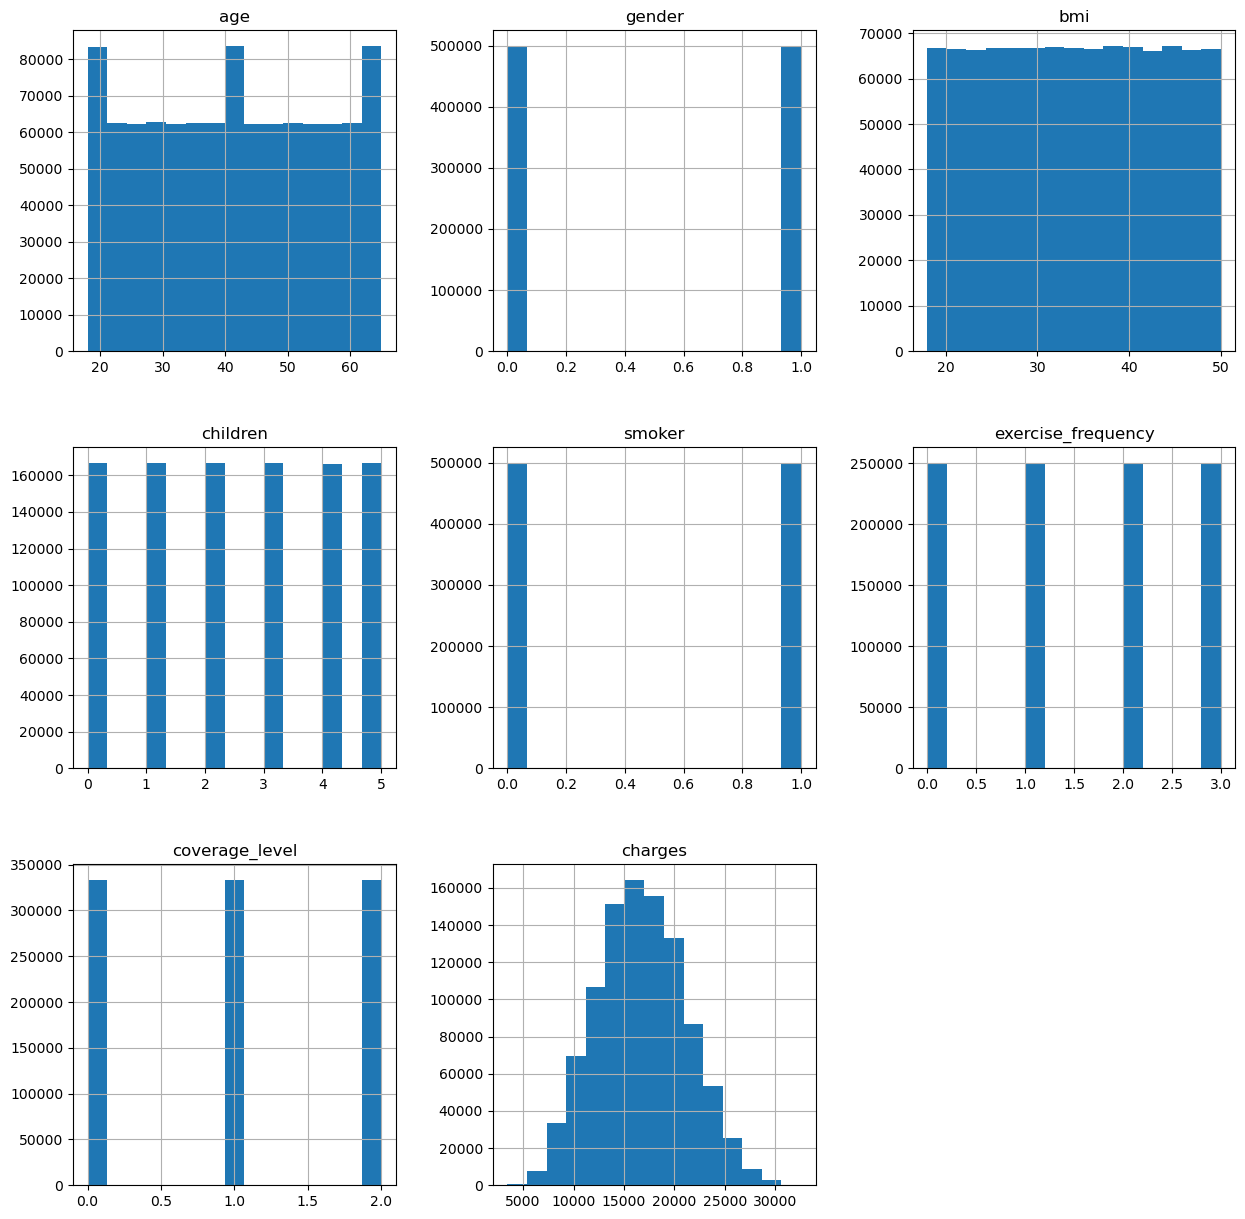

In [61]:
hist = df.hist(bins=15, figsize=(15,15))

Here we can see that visually

In [66]:

def analyze_cohorts(df, attribute, attribute_name, bins=None):
    if bins is not None:
        df[attribute] = pd.cut(df[attribute], bins)
        
    cohorts = df.groupby(attribute)
    for cohort, group_data in cohorts:
        average_charges = group_data['charges'].mean()
        print(f'{attribute_name}: {cohort}, Average Charges: {average_charges:.2f}')
    print()
    for cohort, group_data in cohorts:
        average_freq = group_data['exercise_frequency'].median()
        print(f'{attribute_name}: {cohort}, median exercise frequency: {average_freq}')
        average_freq = group_data['exercise_frequency'].mean()
        print(f'{attribute_name}: {cohort}, mean exercise frequency: {average_freq}')

# Define cohort analyses
cohort_analyses = [
    ('age', 'Age', [0, 20, 30, 40, 50, 60, float('inf')]),
    ('gender', 'Gender', None),
    ('exercise_frequency', 'Exercise Frequency', None),
    ('region', 'Region', None),
    ('smoker', 'Smoking Status', None),
    ('occupation', 'Occupation', None),
    ('bmi', 'BMI', [0, 20, 25, 30, 35, 40, float('inf')])
]

# Perform cohort analysis for each variable
for attribute, attribute_name, bins in cohort_analyses:
    print(f'--- {attribute_name} Cohort Analysis ---')
    analyze_cohorts(df.copy(), attribute, attribute_name, bins)
    print()


--- Age Cohort Analysis ---


/var/folders/yk/gbf3m60d1_bgv0fsygnh_15r0000gn/T/ipykernel_70269/2836982737.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohorts = df.groupby(attribute)


Age: (0.0, 20.0], Average Charges: 16275.22
Age: (20.0, 30.0], Average Charges: 16418.26
Age: (30.0, 40.0], Average Charges: 16612.20
Age: (40.0, 50.0], Average Charges: 16804.92
Age: (50.0, 60.0], Average Charges: 17027.43
Age: (60.0, inf], Average Charges: 17167.83

Age: (0.0, 20.0], median exercise frequency: 1.0
Age: (0.0, 20.0], mean exercise frequency: 1.5009642202565943
Age: (20.0, 30.0], median exercise frequency: 2.0
Age: (20.0, 30.0], mean exercise frequency: 1.5028297946898748
Age: (30.0, 40.0], median exercise frequency: 1.0
Age: (30.0, 40.0], mean exercise frequency: 1.49645083725685
Age: (40.0, 50.0], median exercise frequency: 2.0
Age: (40.0, 50.0], mean exercise frequency: 1.5035437154271665
Age: (50.0, 60.0], median exercise frequency: 1.0
Age: (50.0, 60.0], mean exercise frequency: 1.4989689234984498
Age: (60.0, inf], median exercise frequency: 2.0
Age: (60.0, inf], mean exercise frequency: 1.5006328749784248

--- Gender Cohort Analysis ---
Gender: 0, Average Charges:

/var/folders/yk/gbf3m60d1_bgv0fsygnh_15r0000gn/T/ipykernel_70269/2836982737.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohorts = df.groupby(attribute)


In [67]:
mental = pd.read_csv('survey.csv')
mental.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
